
# Seasonal Arima Models
---

## Learning Objectives
---

### Core

- Plot the decomposition of a timeseries into the components of
    - trend 
    - seasonal pattern
    - residuals
- Perform seasonal differencing on data
- Examine the use of SARIMAX state-space modeling for advanced timeseries forecasting

### Target
- Produce a diagnostic plot of the residuals

### Stretch
- Conduct a Dickey-Fuller test for stationarity and plot the results

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Statsmodels-timeseries-tools" data-toc-modified-id="Statsmodels-timeseries-tools-2">Statsmodels timeseries tools</a></span></li><li><span><a href="#Bus-ridership-data" data-toc-modified-id="Bus-ridership-data-3">Bus ridership data</a></span><ul class="toc-item"><li><span><a href="#Clean-the-data" data-toc-modified-id="Clean-the-data-3.1">Clean the data</a></span></li><li><span><a href="#Create-a-date-index-for-the-data" data-toc-modified-id="Create-a-date-index-for-the-data-3.2">Create a date index for the data</a></span></li></ul></li><li><span><a href="#Plot-the-riders-across-months" data-toc-modified-id="Plot-the-riders-across-months-4">Plot the riders across months</a></span></li><li><span><a href="#Decompose-the-timeseries-and-plot" data-toc-modified-id="Decompose-the-timeseries-and-plot-5">Decompose the timeseries and plot</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plot-just-the-seasonal-component" data-toc-modified-id="Plot-just-the-seasonal-component-5.0.1">Plot just the seasonal component</a></span></li></ul></li></ul></li><li><span><a href="#Seasonal-ARIMA-(SARIMAX)" data-toc-modified-id="Seasonal-ARIMA-(SARIMAX)-6">Seasonal ARIMA (SARIMAX)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ordinary-differencing" data-toc-modified-id="Ordinary-differencing-6.0.1">Ordinary differencing</a></span></li><li><span><a href="#Seasonal-differencing" data-toc-modified-id="Seasonal-differencing-6.0.2">Seasonal differencing</a></span></li><li><span><a href="#Mixtures-of-seasonal-and-ordinary-differencing" data-toc-modified-id="Mixtures-of-seasonal-and-ordinary-differencing-6.0.3">Mixtures of seasonal and ordinary differencing</a></span></li><li><span><a href="#SARIMAX(0,-2,-1)x(1,-0,-1,-12)" data-toc-modified-id="SARIMAX(0,-2,-1)x(1,-0,-1,-12)-6.0.4">SARIMAX(0, 2, 1)x(1, 0, 1, 12)</a></span></li><li><span><a href="#Plot-the-ACF-and-PACF-of-the-residuals" data-toc-modified-id="Plot-the-ACF-and-PACF-of-the-residuals-6.0.5">Plot the ACF and PACF of the residuals</a></span></li></ul></li><li><span><a href="#Forecast-using-the-SARIMAX-model" data-toc-modified-id="Forecast-using-the-SARIMAX-model-6.1">Forecast using the SARIMAX model</a></span></li><li><span><a href="#Force-coefficients-to-zero" data-toc-modified-id="Force-coefficients-to-zero-6.2">Force coefficients to zero</a></span></li></ul></li><li><span><a href="#Dickey-Fuller-test-of-stationarity" data-toc-modified-id="Dickey-Fuller-test-of-stationarity-7">Dickey-Fuller test of stationarity</a></span><ul class="toc-item"><li><span><a href="#Perform-test-on-the-original-timeseries" data-toc-modified-id="Perform-test-on-the-original-timeseries-7.1">Perform test on the original timeseries</a></span></li><li><span><a href="#Perform-test-on-the-first-differenced-timeseries" data-toc-modified-id="Perform-test-on-the-first-differenced-timeseries-7.2">Perform test on the first-differenced timeseries</a></span></li><li><span><a href="#Perform-test-on-the-second-differenced-timeseries" data-toc-modified-id="Perform-test-on-the-second-differenced-timeseries-7.3">Perform test on the second-differenced timeseries</a></span></li><li><span><a href="#Perform-test-on-seasonally-differenced-timeseries" data-toc-modified-id="Perform-test-on-seasonally-differenced-timeseries-7.4">Perform test on <em>seasonally</em>-differenced timeseries</a></span></li><li><span><a href="#Perform-a-test-on-the-first-differenced-seasonally-differenced-timeseries" data-toc-modified-id="Perform-a-test-on-the-first-differenced-seasonally-differenced-timeseries-7.5">Perform a test on the first differenced seasonally differenced timeseries</a></span></li><li><span><a href="#Perform-test-on-the-second-differenced-seasonally-differenced-timeseries" data-toc-modified-id="Perform-test-on-the-second-differenced-seasonally-differenced-timeseries-7.6">Perform test on the second differenced seasonally differenced timeseries</a></span></li><li><span><a href="#Summary-Dickey-Fuller-test" data-toc-modified-id="Summary-Dickey-Fuller-test-7.7">Summary Dickey-Fuller test</a></span></li></ul></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-8">Additional resources</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Statsmodels timeseries tools
---

Statsmodels, has a wide variety of reliable timeseries analysis tools. We will start off by loading the autocorrelation and partial autocorrelation functions, as well as a function to decompose timeseries.

In [2]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

## Bus ridership data
---

We are going to play around with some Portland, OR bus data. Load in the bus data below and check it out.

### Clean the data

In [3]:
# data https://datamarket.com/data/set/22w6/portland-oregon-average-monthly-bus-ridership-100-january-1973-through-june-1982-n114#!ds=22w6&display=line
bus = pd.read_csv('../../../../resource-datasets/portland_bus_riders/portland-oregon-average-monthly-.csv', index_col=0)
bus.index.name = None
bus.reset_index(inplace=True)
bus.head()

,index,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
bus.tail()

,index,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


There are a couple of bad rows. Get rid of them.

In [5]:
bus.drop([114,115], inplace=True,axis=0)

Rename the columns and make the riders column an integer:

In [7]:
bus.columns = ['date','riders']
bus['riders'] = bus.riders.apply(lambda x: int(x))
bus.head()

,date,riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


### Create a date index for the data

In [8]:
bus['date'] = pd.to_datetime(bus.date)
bus.set_index('date', inplace=True, drop=True)

In [10]:
bus.index.name = None
date_list = list(bus.index)

print(len(date_list))  
print(len(bus.index))

114
114


In [11]:
bus.head()

,riders
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


## Plot the riders across months
---

We can look at the raw ridership data first.

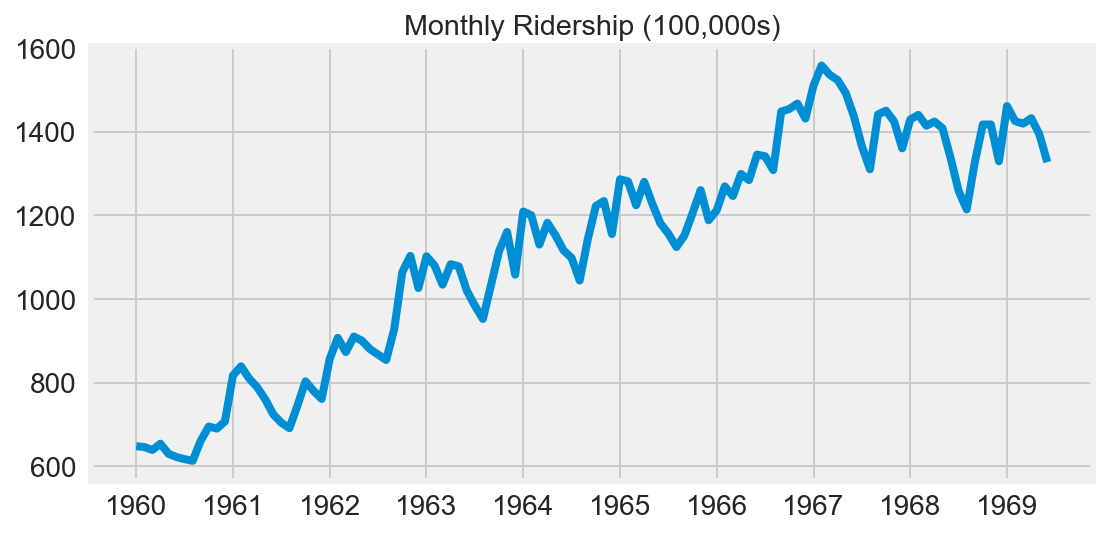

In [12]:
bus.riders.plot(figsize=(8,4), title= 'Monthly Ridership (100,000s)', fontsize=14)
plt.show()

## Decompose the timeseries and plot
---

Using the `seasonal_decompose` function, we can break the timeseries into its constituent parts.

Use the function on the riders data with a frequency of 12, then plot the data.

> **Hint:** The decomposition object from `seasonal_decompose` has a `.plot` function like for pandas dataframes

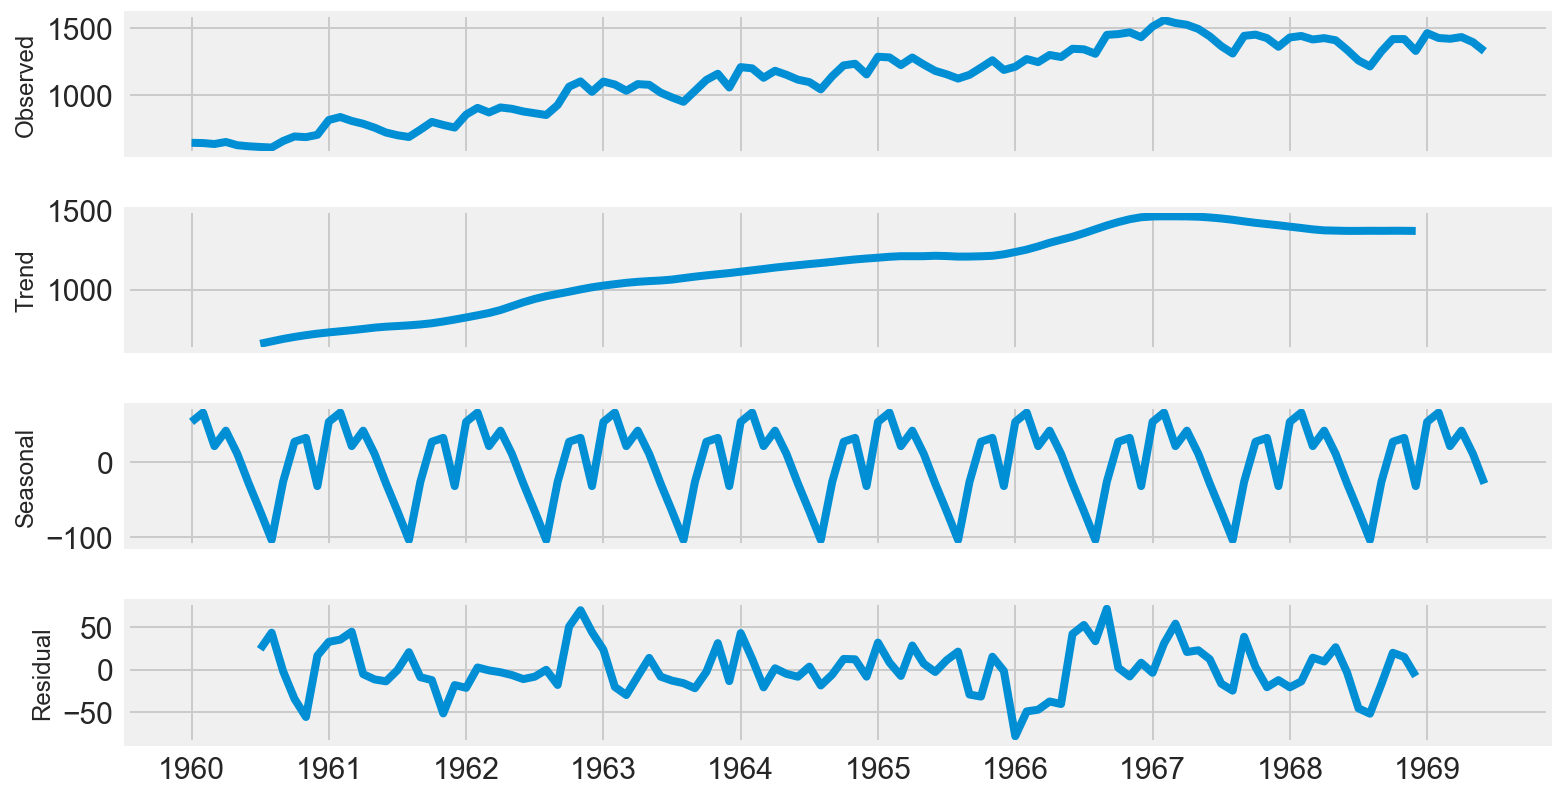

In [26]:
decomposition = seasonal_decompose(bus.riders)  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)
plt.show()

#### Plot just the seasonal component

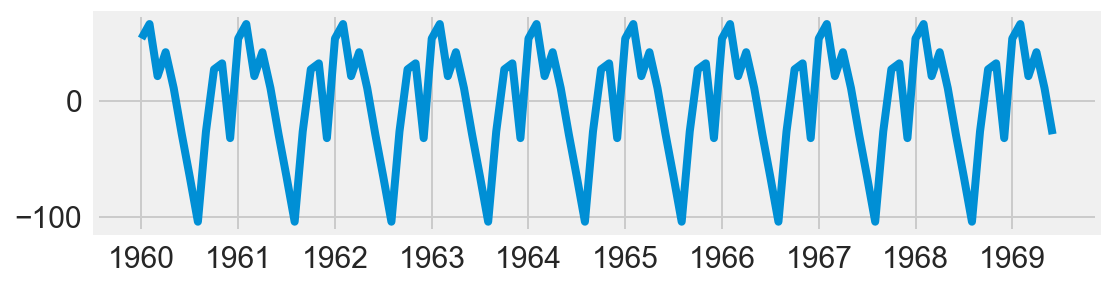

In [15]:
# grab just one graphic doing the following:
decomposition.seasonal.plot(figsize=(8,2))
plt.show()

## Seasonal ARIMA (SARIMAX)
---

Apparently we have a strong trend component which leads to a long time of fairly linear increase leveling off at later times. Additionally we do have some periodic pattern even though this is much less pronounced than the trend component.

The trend component implies that we will have to take some differencing step to reach stationarity.

An annual seasonal effect means that it would be good to include information from lags one or two years preceding in our ARIMA model. We could easily do that by modeling on all lags up to two years ago - ultimately ending up with a model that includes more than twenty parameters even though we have little more than 100 observations.

SARIMA models try to include this information in a more economic way by modeling on the lags at seasonal distance, but not on those in between. In this way we can keep the number of coefficients low.

We are going to use the statsmodels [SARIMAX model](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html) which is an advanced state space model that allows us to build a Seasonal ARIMA model and also to take into account the effects of other predictors.

The granular details of SARIMAX are beyond the scope of this walkthrough, but we can build a model and use it to forecast as an example of the powerful timeseries analysis capabilities that statsmodels contains.

SARIMAX has the possibility to include certain lags into our model and forcing the coefficients of others to zero. For this reason, this implementation is also an enhanced version for fitting non-seasonal ARIMA models.

SARIMA models are indicated as being of the form

$$(p,d,q)\times(p_S,d_S,q_S,S)$$

The first triple indicates the usual ARIMA model. The second set of numbers indicates on how many lags of observations and noise terms at lag distance $S$ one models and how many seasonal differencing steps are taken.

Let's first clarify the role of the differencing steps. As before, they serve to obtain stationarity.

#### Ordinary differencing

That is what we used before.

In [16]:
# first difference, d=1, d_S=0
bus['first_difference'] = bus.riders.diff()
# second difference, d=2, d_S=0
bus['second_difference'] = bus.riders.diff().diff()

#### Seasonal differencing

We can now model on a seasonally differenced time series.

In [17]:
# seasonal difference, d=0, d_S=1
bus['seasonal_difference'] = bus.riders - bus.riders.shift(12) 

#### Mixtures of seasonal and ordinary differencing

We can mix both. The order does not matter.

In [47]:
# first and seasonal difference, d=, d_S=1
bus['seasonal_difference'] = (bus.riders - bus.riders.shift(12))
# seasonal and first difference, d=1, d_S=1
bus['seasonal_first_difference'] = (bus.riders - bus.riders.shift(12)).diff()
# seasonal and second difference , d=2, d_S=1
bus['seasonal_second_difference'] = (bus.riders - bus.riders.shift(12)).diff().diff()

In [22]:
bus.head(15)

,riders,first_difference,second_difference,seasonal_difference,seasonal_first_difference,seasonal_second_difference
1960-01-01,648,NaN,NaN,NaN,NaN,NaN
1960-02-01,646,-2.0,NaN,NaN,NaN,NaN
1960-03-01,639,-7.0,-5.0,NaN,NaN,NaN
1960-04-01,654,15.0,22.0,NaN,NaN,NaN
1960-05-01,630,-24.0,-39.0,NaN,NaN,NaN
1960-06-01,622,-8.0,16.0,NaN,NaN,NaN
1960-07-01,617,-5.0,3.0,NaN,NaN,NaN
1960-08-01,613,-4.0,1.0,NaN,NaN,NaN
1960-09-01,661,48.0,52.0,NaN,NaN,NaN
1960-10-01,695,34.0,-14.0,NaN,NaN,NaN


#### SARIMAX(0, 2, 1)x(1, 0, 1, 12)	

Let's fit a particular combination.

In [23]:
data = bus.riders
model = sm.tsa.statespace.SARIMAX(data, 
                                  order=(0,2,1), 
                                  seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(0, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -564.452
Date:                            Tue, 15 Jan 2019   AIC                           1136.904
Time:                                    10:02:39   BIC                           1147.778
Sample:                                01-01-1960   HQIC                          1141.316
                                     - 06-01-1969                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9993      0.128     -7.799      0.000      -1.250      -0.748
ar.S.L12       0.9671      0.029     33.506      0.000       0.911       1.024
ma.S.L12      -0.6191      0.128     -4.848      0.000      -0.869      -0.369
sigma2      1185.7654    207.997      5.701      0.000     778.099    1593.432
===================================================================================
Ljung-Box (Q):                       35.45   Jarque-Bera (JB):                 2.93
Prob(Q):                              0.68   Prob(JB):                         0.23
Heteroskedasticity (H):               1.73   Skew:                             0.35
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Plot the ACF and PACF of the residuals

The SARIMA object includes the residual plots that we had to create by hand for the ARIMA model.

What should we be expecting from the ACF and PACF of our residuals if the model is good?

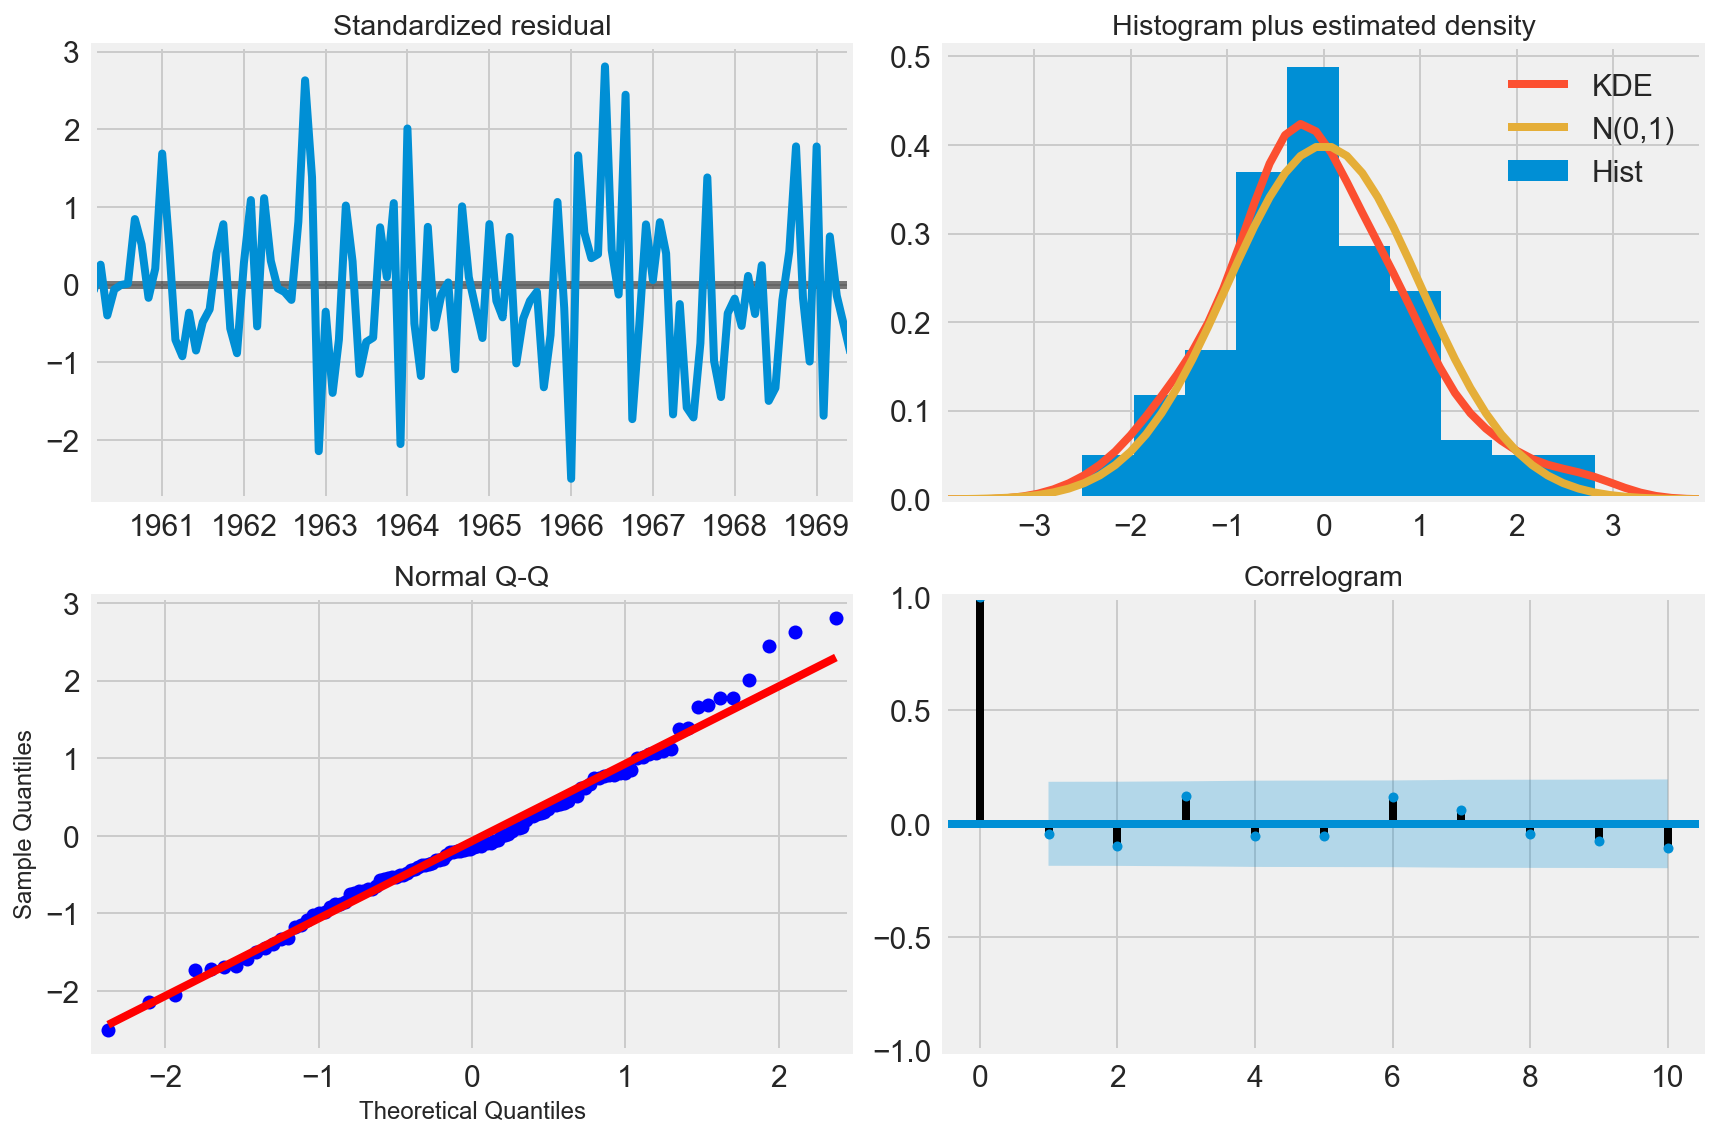

In [24]:
results.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()

### Forecast using the SARIMAX model

Statsmodels result objects from SARIMAX have a `.forecast` function that can use the state space model to predict future timepoints.

Forecast additional timepoints and plot them.

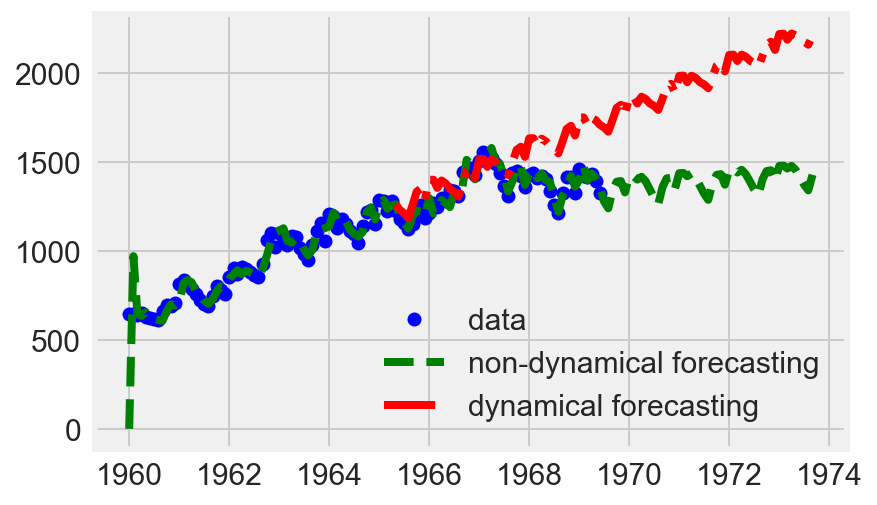

In [31]:
# forecasting
start_p = 50

# two equivalent ways for getting non-dynamical forecasts
# preds = results.forecast(50)
preds = results.predict(start=0,end=len(data)+50,dynamic=False)

preds_dyn = results.predict(start=len(data)-start_p,end=len(data)+50, dynamic=True)
fcast = pd.concat([data,preds])
fcast_1 = pd.concat([data[:len(data)-start_p],preds_dyn])


plt.figure()
plt.plot(data, 'bo' , preds, 'g--',preds_dyn,'r-.')
plt.legend(['data','non-dynamical forecasting','dynamical forecasting'])
plt.show()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

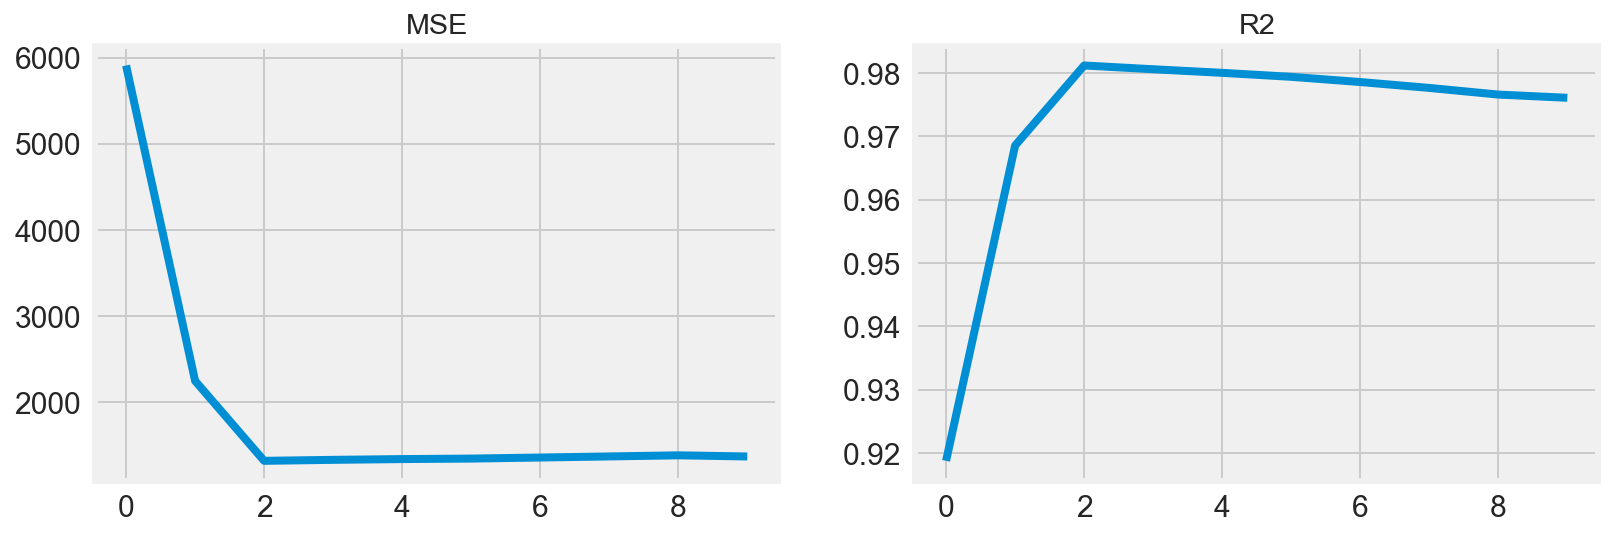

In [32]:
fig, ax = plt.subplots(ncols=2,figsize=(12,4))
ax[0].plot([mean_squared_error(data[i:],preds[i:len(data)]) for i in range(10)])
ax[0].set_title('MSE')
ax[1].plot([r2_score(data[i:],preds[i:len(data)]) for i in range(10)])
ax[1].set_title('R2')
plt.show()

### Force coefficients to zero

Instead of simply indicating orders $p$ and $q$, we can pass for each parameter a list of binary values indicating which lag to include and which one to exclude. That is also very convenient for pure ARIMA models.

(In this case, this is not a model improvement.)

In [35]:
model = sm.tsa.statespace.SARIMAX(data, 
                                  order=((0,1,1,0),1,(0,1)), 
                                  seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         Statespace Model Results                                         
==========================================================================================================
Dep. Variable:                                             riders   No. Observations:                  114
Model:             SARIMAX((2, 3), 1, (2,))x((12,), 0, (12,), 12)   Log Likelihood                -566.801
Date:                                            Tue, 15 Jan 2019   AIC                           1145.603
Time:                                                    11:00:51   BIC                           1161.967
Sample:                                                01-01-1960   HQIC                          1152.243
                                                     - 06-01-1969                                         
Covariance Type:                                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.0639      0.622     -0.103      0.918      -1.283       1.156
ar.L3          0.1230      0.096      1.284      0.199      -0.065       0.311
ma.L2         -0.0189      0.613     -0.031      0.975      -1.221       1.183
ar.S.L12       0.9572      0.033     29.390      0.000       0.893       1.021
ma.S.L12      -0.5789      0.124     -4.676      0.000      -0.821      -0.336
sigma2      1163.6367    169.633      6.860      0.000     831.163    1496.110
===================================================================================
Ljung-Box (Q):                       28.66   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.91   Prob(JB):                         0.24
Heteroskedasticity (H):               1.58   Skew:                             0.34
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Dickey-Fuller test of stationarity
---

Now we have many different options for performing differencing. Having reached stationarity can be judged in similar ways as before by eye inspection. However, a statistical test might give a more informed statement. We can use the 
[(augmented) Dickey-Fuller test of stationarity](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) to evaluate whether or not the timeseries is stationary.


In [36]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,maxlag=None,regression='c',autolag='AIC'):
    '''Perform Dickey-Fuller test and print out results'''
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,maxlag=maxlag,regression=regression,autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

def rolling(timeseries,window=12,center=True,figsize=(12,8)):
    '''
    Plot original timeseries, 
    rolling mean over given window size and rolling 
    mean plus/minus standard deviation
    '''
    
    rolmean = timeseries.rolling(window=window, center=center).mean()
    rolstd = timeseries.rolling(window=window, center=center).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=figsize)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std_plus = plt.plot(rolmean+rolstd, color='red',ls='--', label = 'Rolling Mean +/- Rolling Std')
    std_minus = plt.plot(rolmean-rolstd, color='red',ls='--',label= '')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()  

def autocorrelation_plot(timeseries,lags=None):
    '''Plot autocorrelations and partial autocorrelations'''
    fig, ax = plt.subplots(ncols=2,figsize=(12,4))
    plot_acf(timeseries, lags=lags, ax=ax[0])
    plot_pacf(timeseries, lags=lags, ax=ax[1])
    plt.show()

def test_and_vis(timeseries):
    '''
    Perform Dickey-Fuller test, 
    plot timeseries with rolling mean and autocorrelations
    '''
    test_stationarity(timeseries.dropna())
    rolling(timeseries)
    autocorrelation_plot(timeseries.dropna())

<a id="perform-test-on-the-original-timeseries"></a>
### Perform test on the original timeseries

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


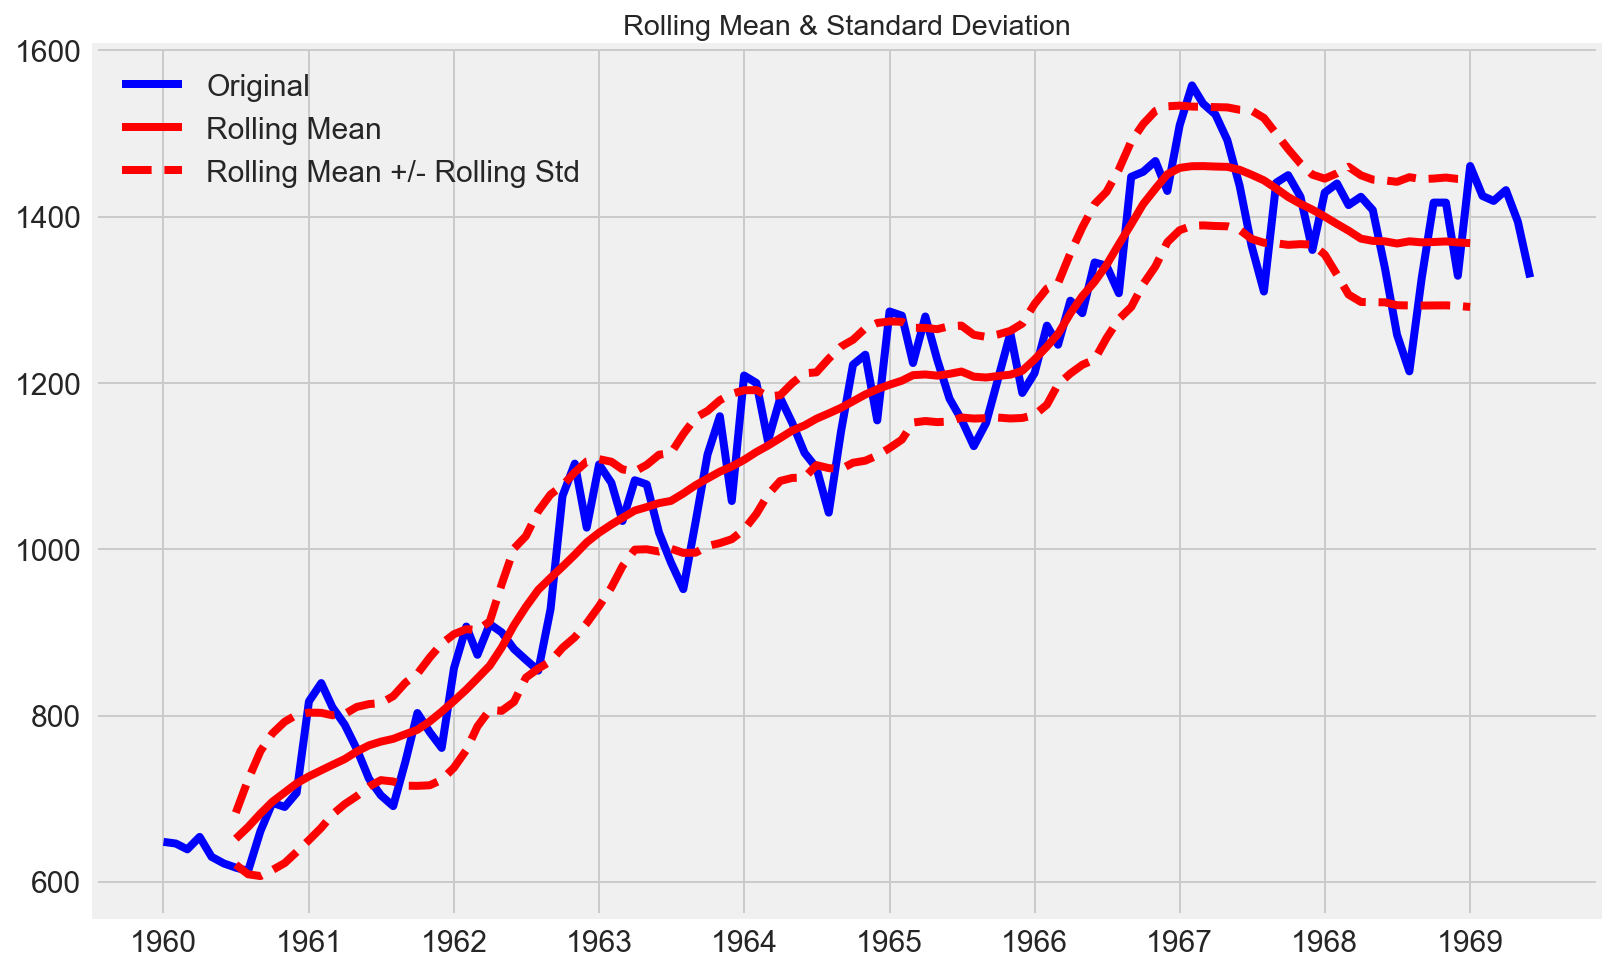

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


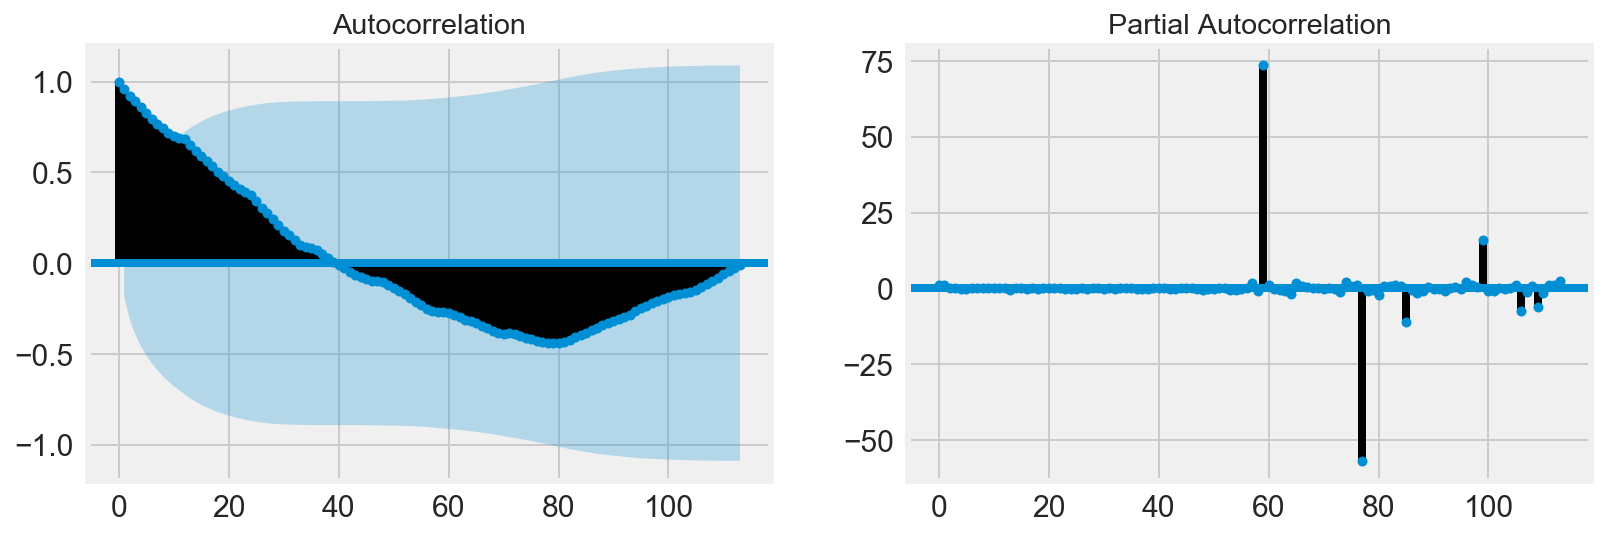

In [37]:
test_and_vis(bus.riders)

<a id="perform-test-on-the-first-differenced-timeseries"></a>
### Perform test on the first-differenced timeseries

Results of Dickey-Fuller Test:
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


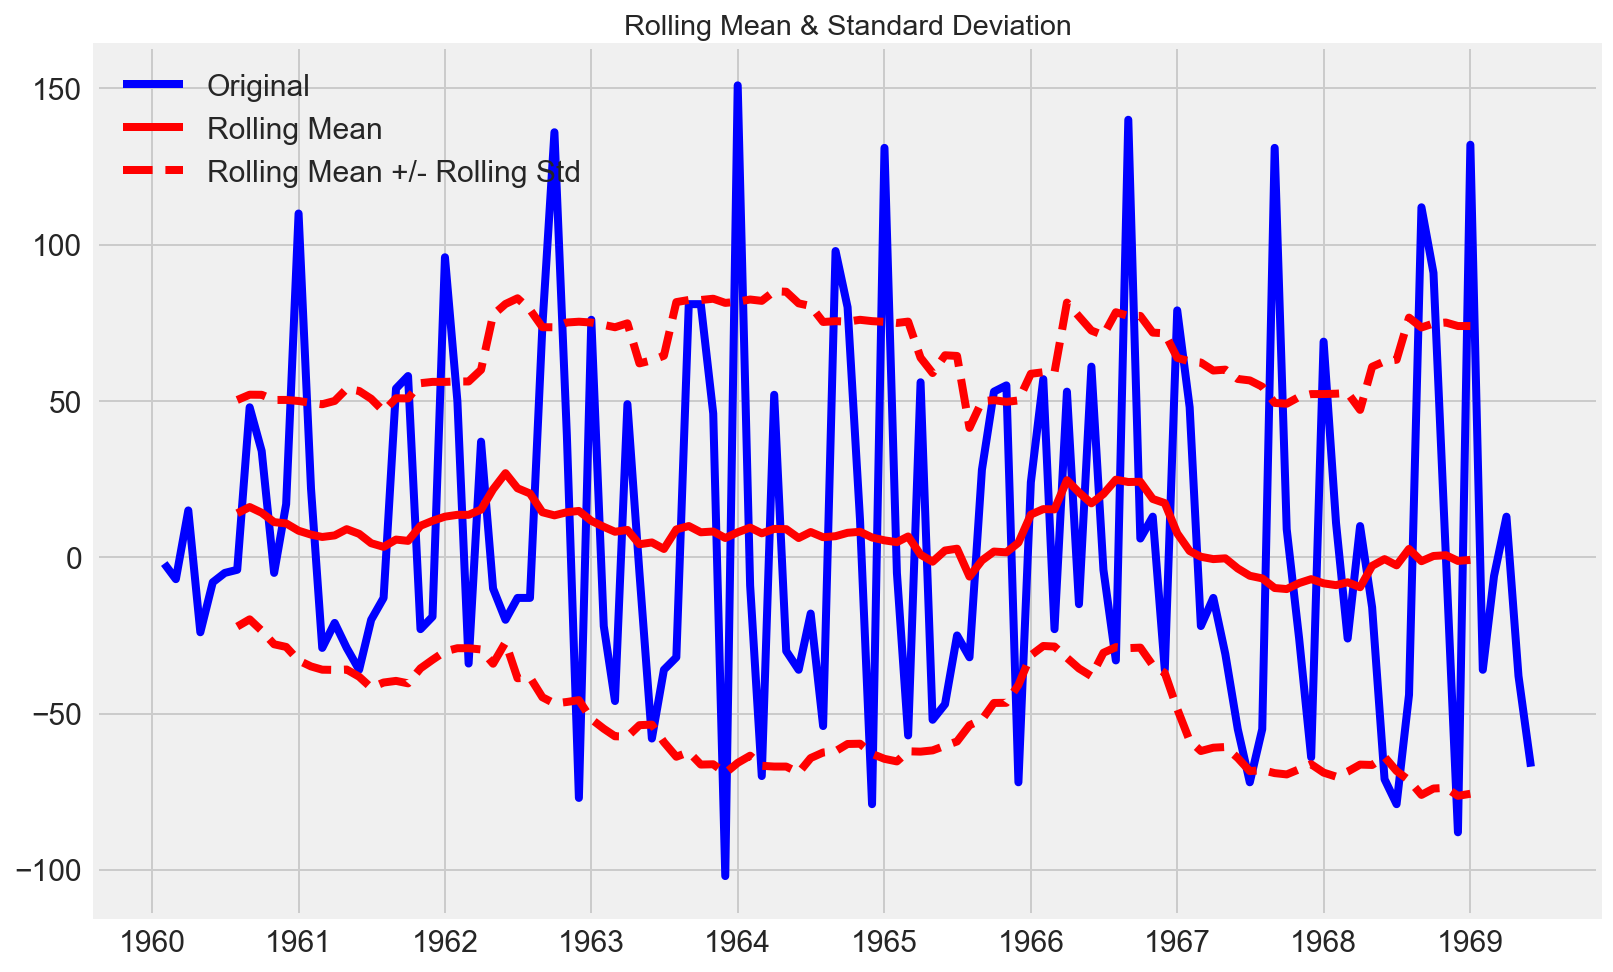

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


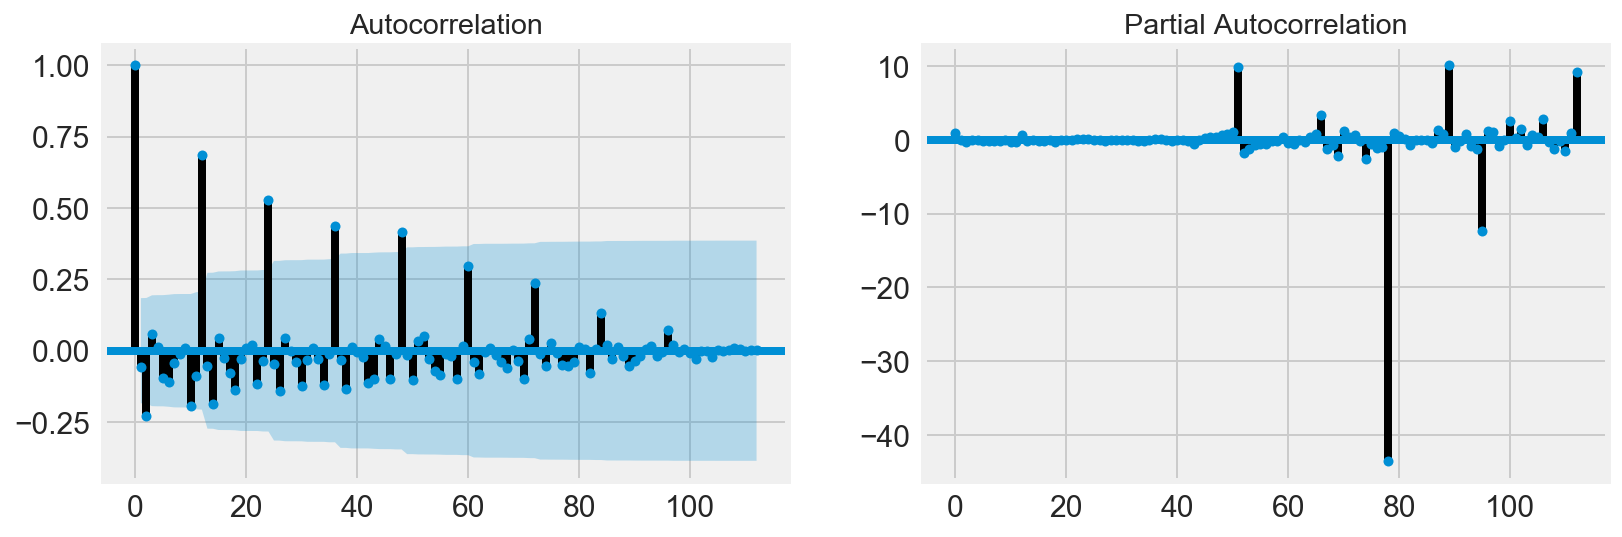

In [48]:
test_and_vis(bus.first_difference)

<a id="perform-test-on-the-second-differenced-timeseries"></a>
### Perform test on the second-differenced timeseries

Results of Dickey-Fuller Test:
Test Statistic                -1.247869e+01
p-value                        3.126378e-23
#Lags Used                     1.000000e+01
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64


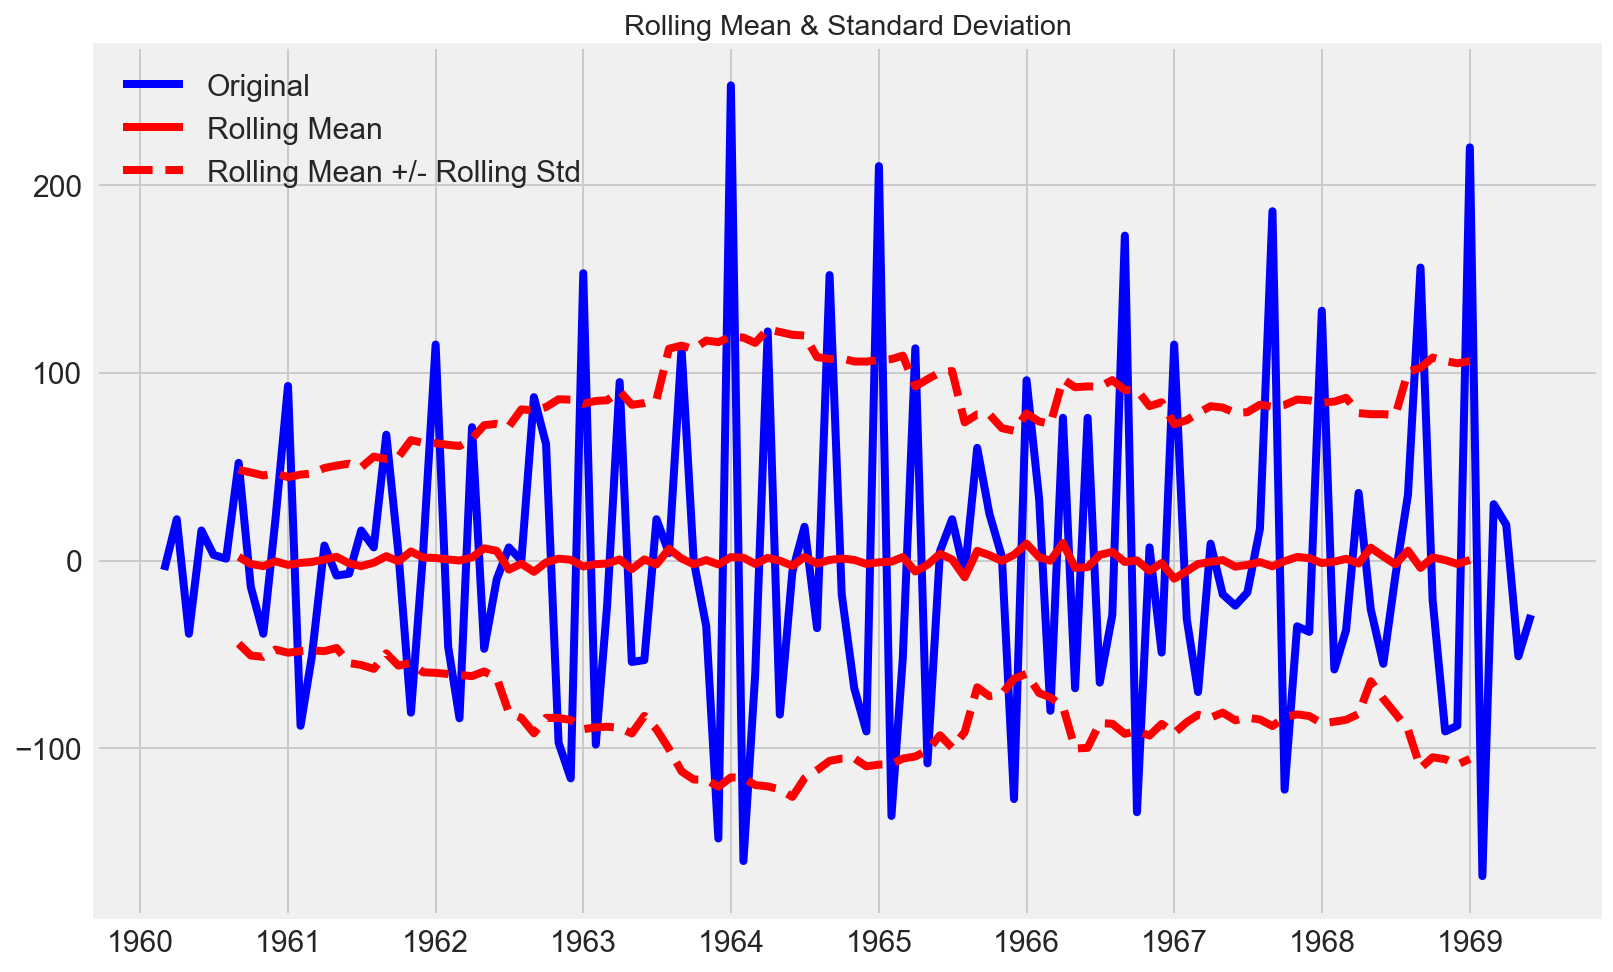

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


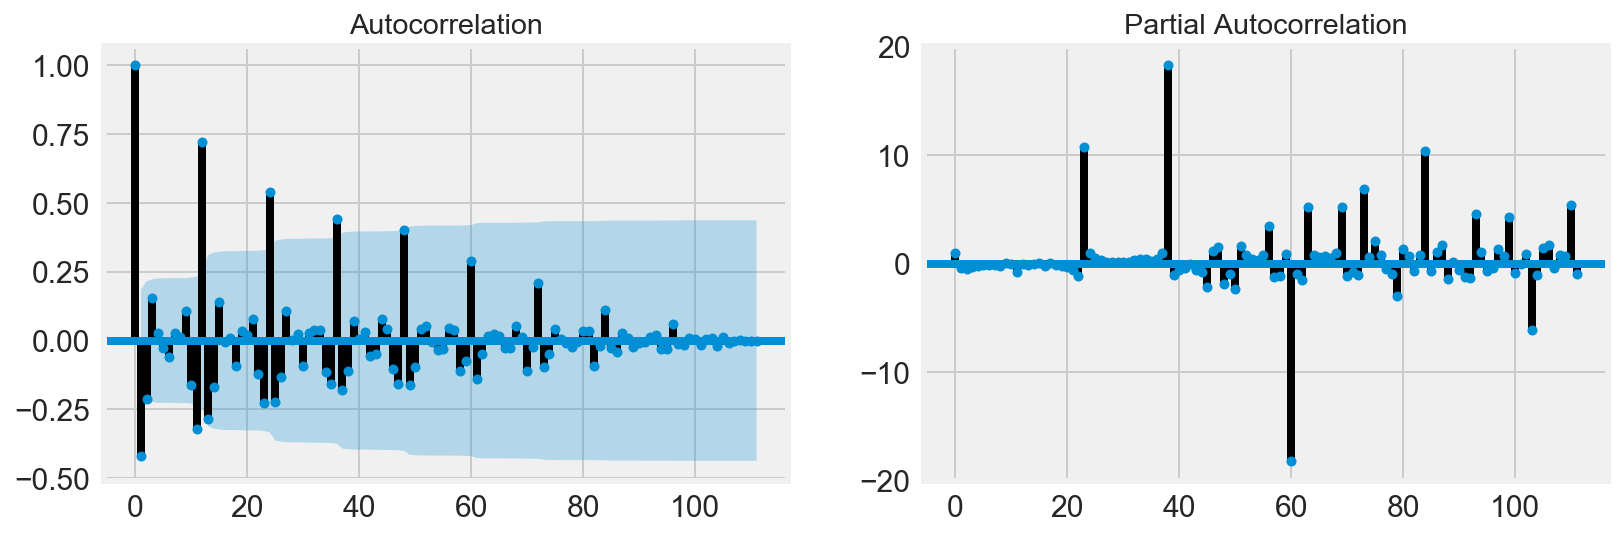

In [39]:
test_and_vis(bus.second_difference)

<a id="perform-test-on-seasonal-differenced-timeseries"></a>
### Perform test on *seasonally*-differenced timeseries

Where the season will be a year's difference (12 months).

Results of Dickey-Fuller Test:
Test Statistic                 -2.469741
p-value                         0.123011
#Lags Used                      3.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


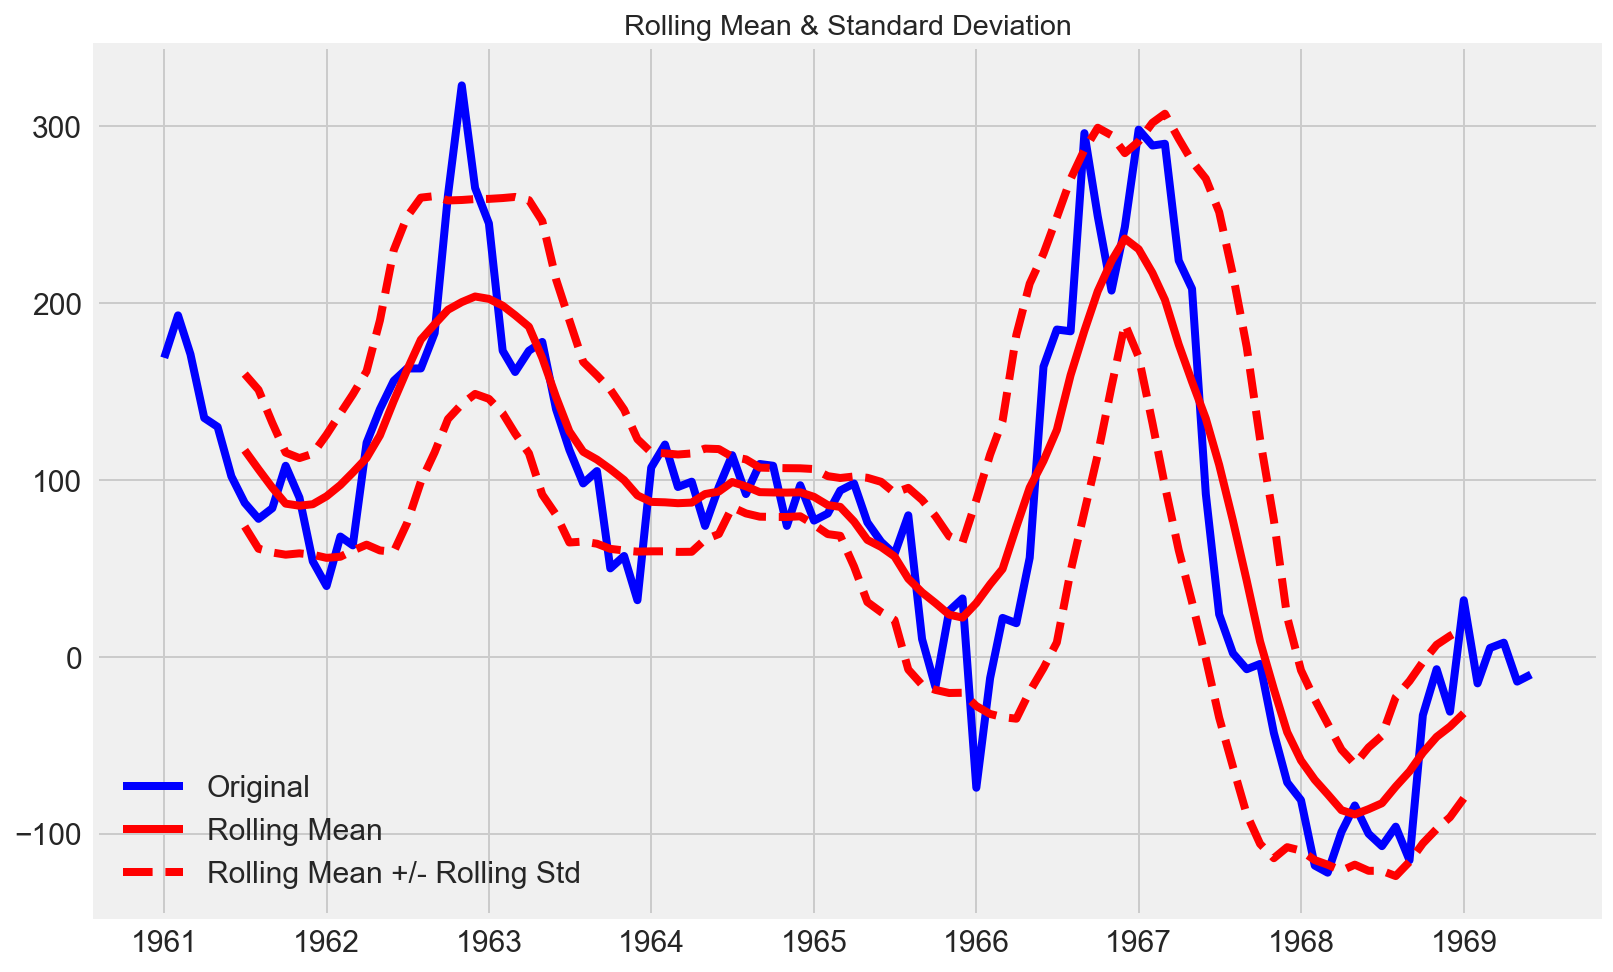

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


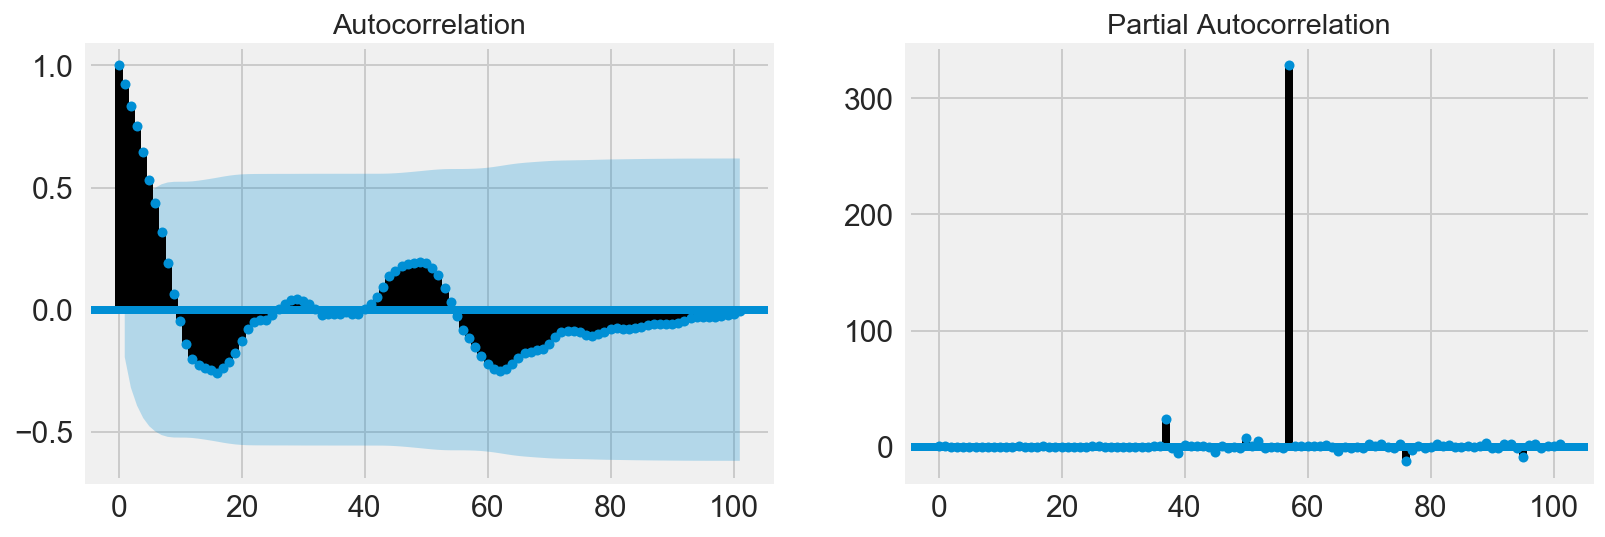

In [40]:
test_and_vis(bus.seasonal_difference)

### Perform a test on the first differenced seasonally differenced timeseries

At this point we can see that we have a significant result!

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


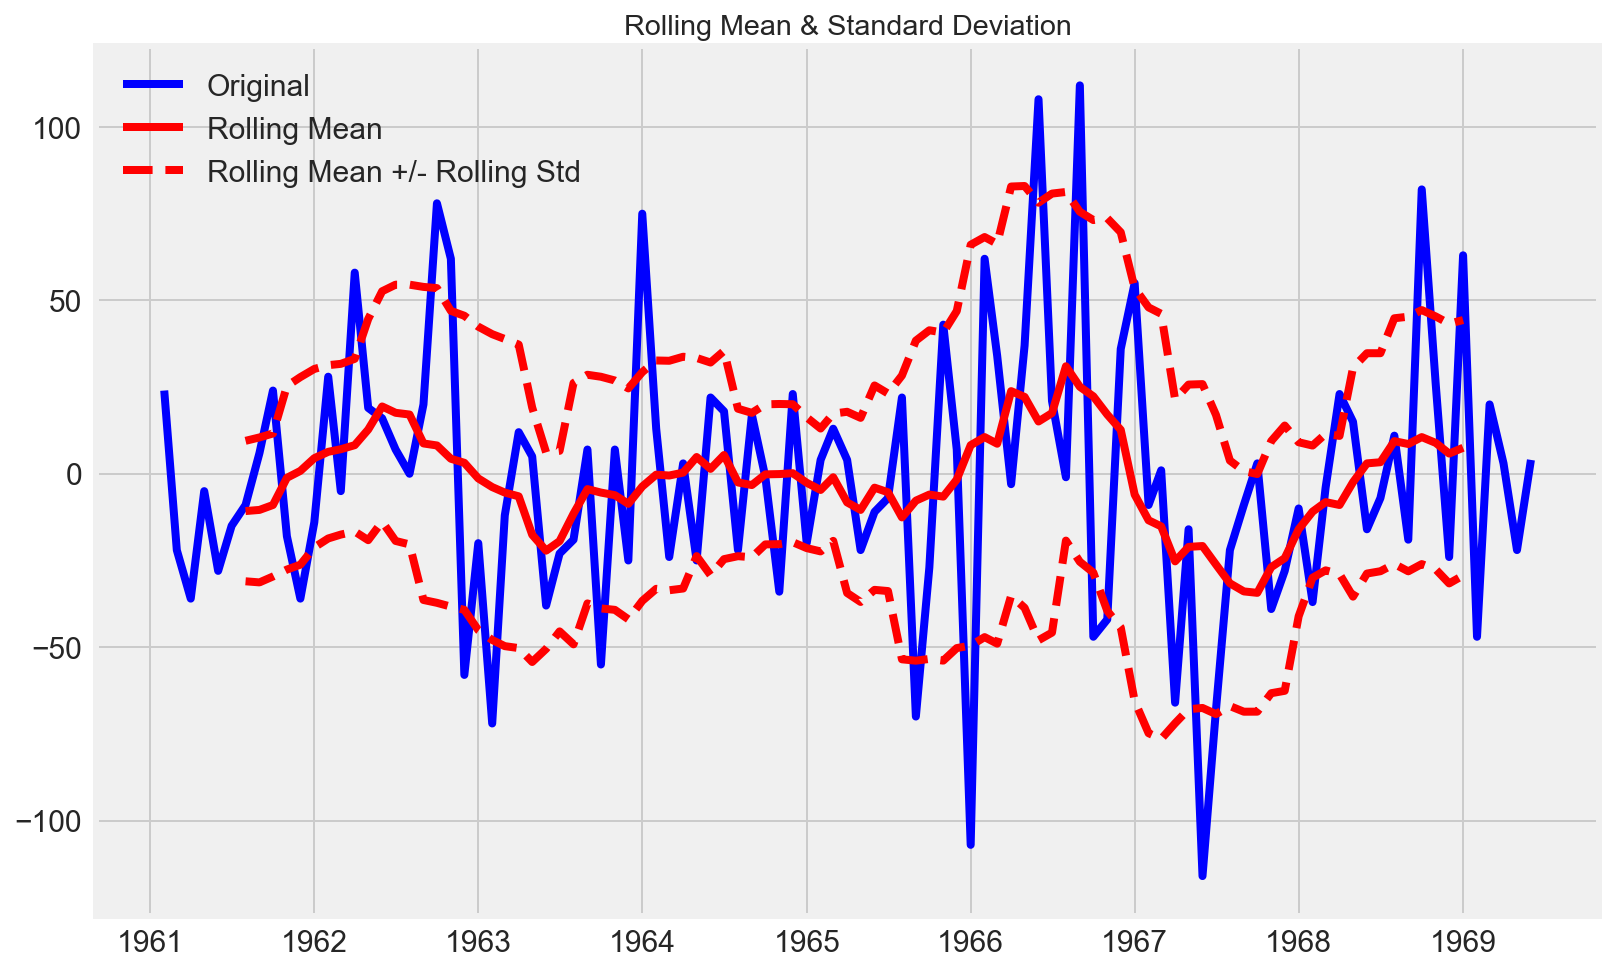

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


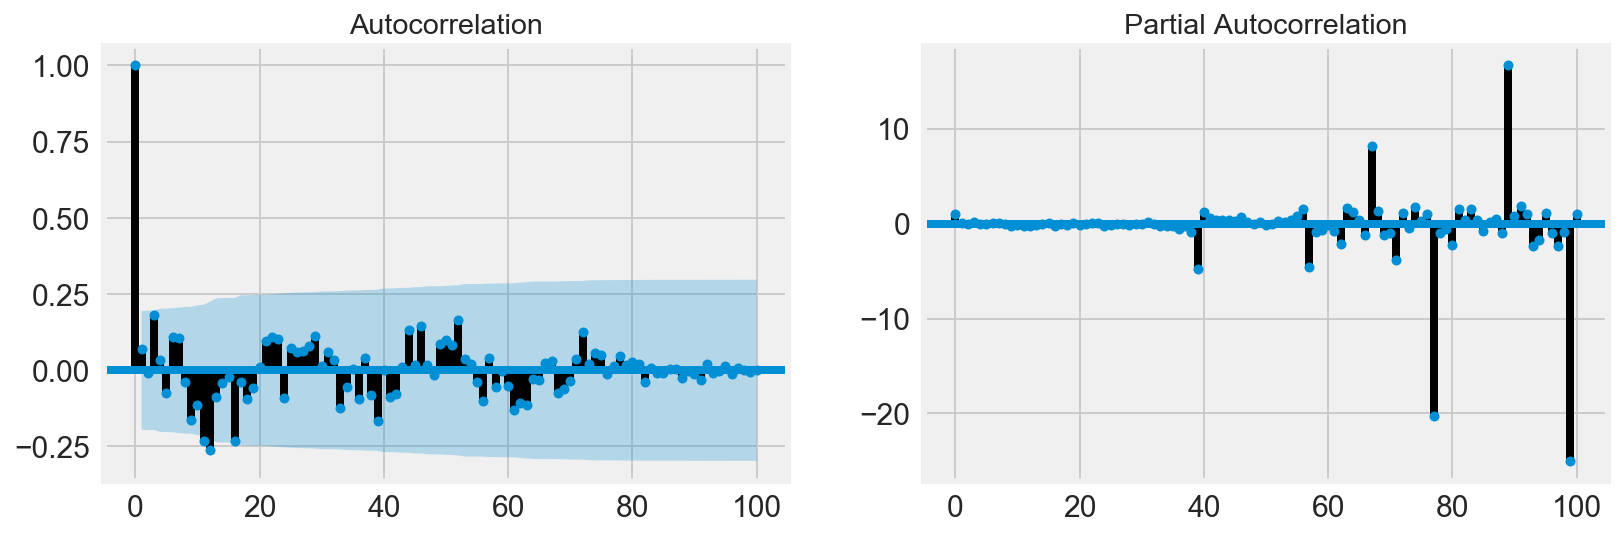

In [41]:
# first seasonal difference
test_and_vis(bus.seasonal_first_difference)

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


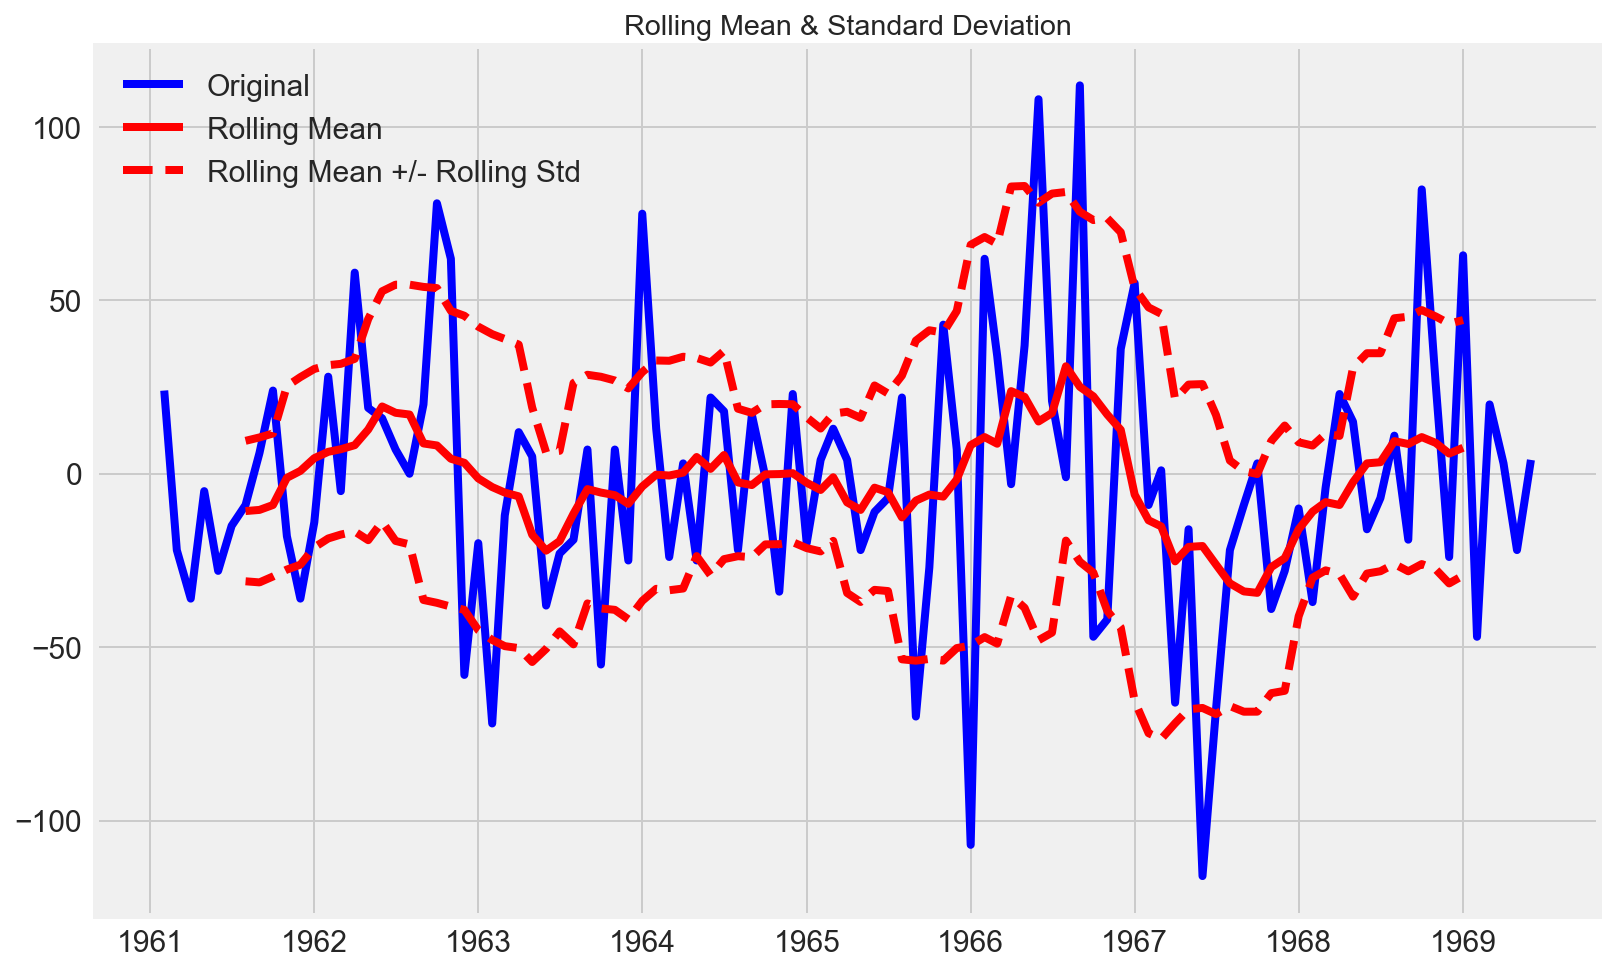

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


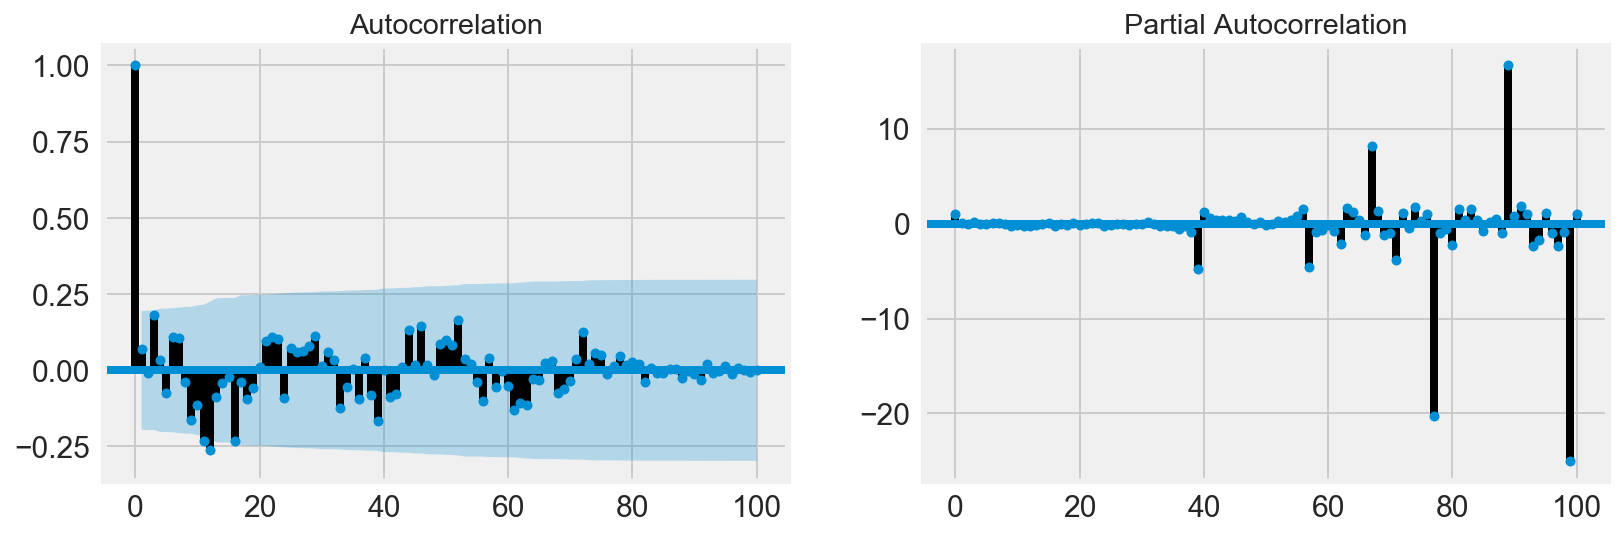

In [42]:
# first seasonal difference
test_and_vis(bus.seasonal_first_difference)

<a id="perform-test-on-the-second-seasonal-differenced-timeseries"></a>
### Perform test on the second differenced seasonally differenced timeseries

Results of Dickey-Fuller Test:
Test Statistic                -6.853777e+00
p-value                        1.668418e-09
#Lags Used                     5.000000e+00
Number of Observations Used    9.400000e+01
Critical Value (1%)           -3.501912e+00
Critical Value (5%)           -2.892815e+00
Critical Value (10%)          -2.583454e+00
dtype: float64


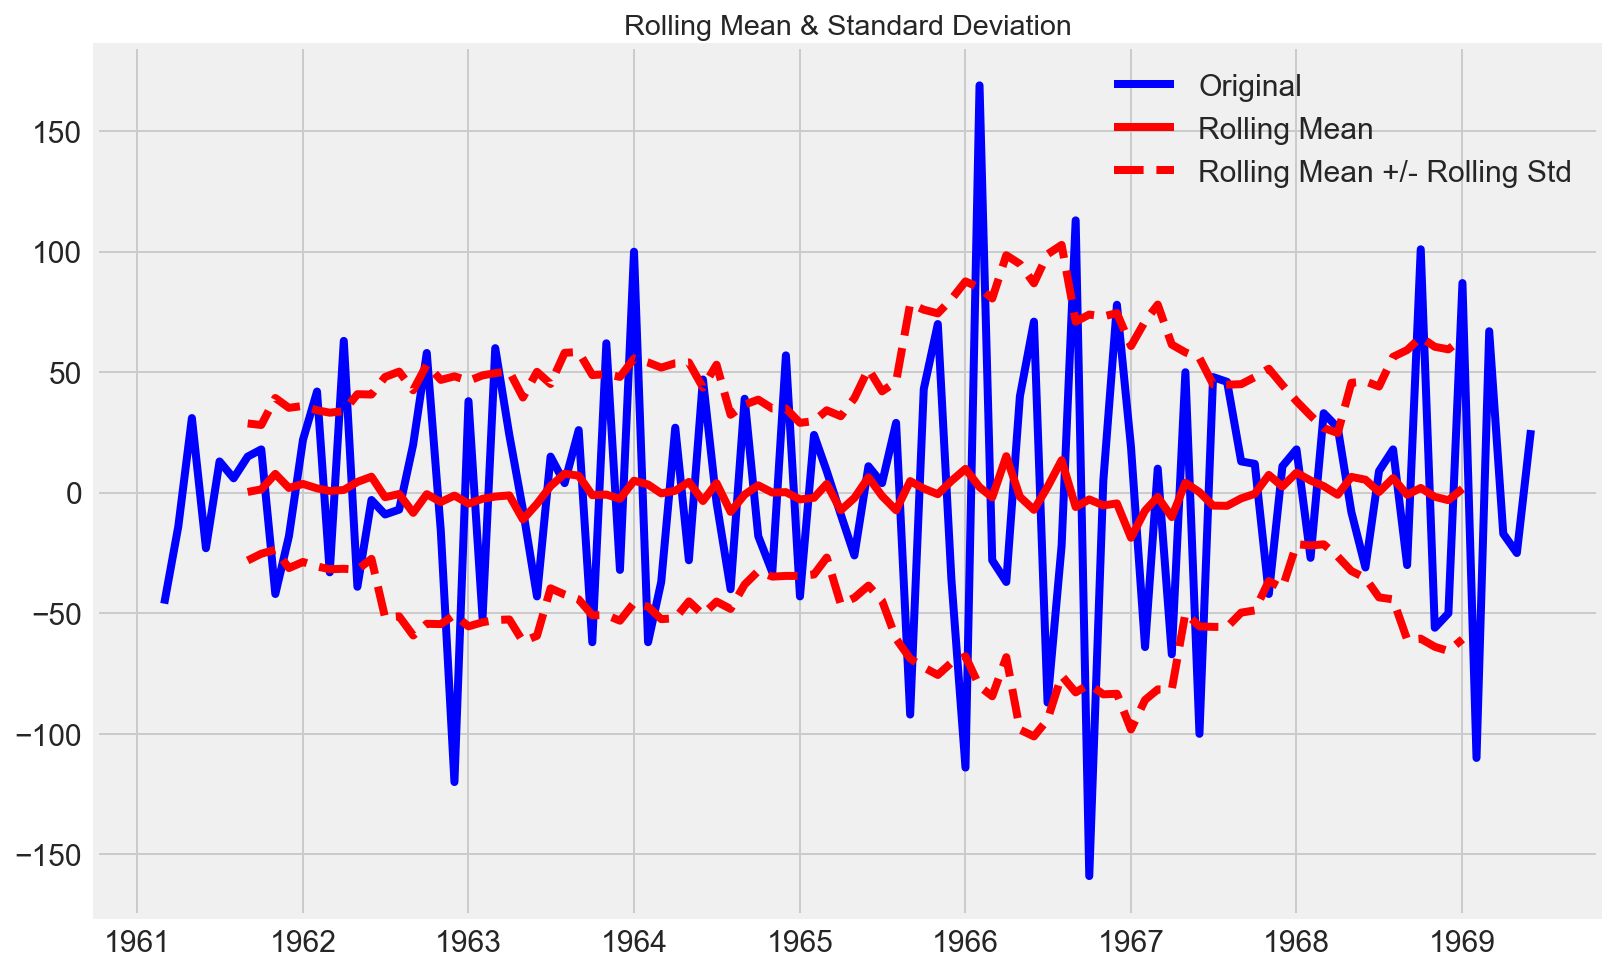

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


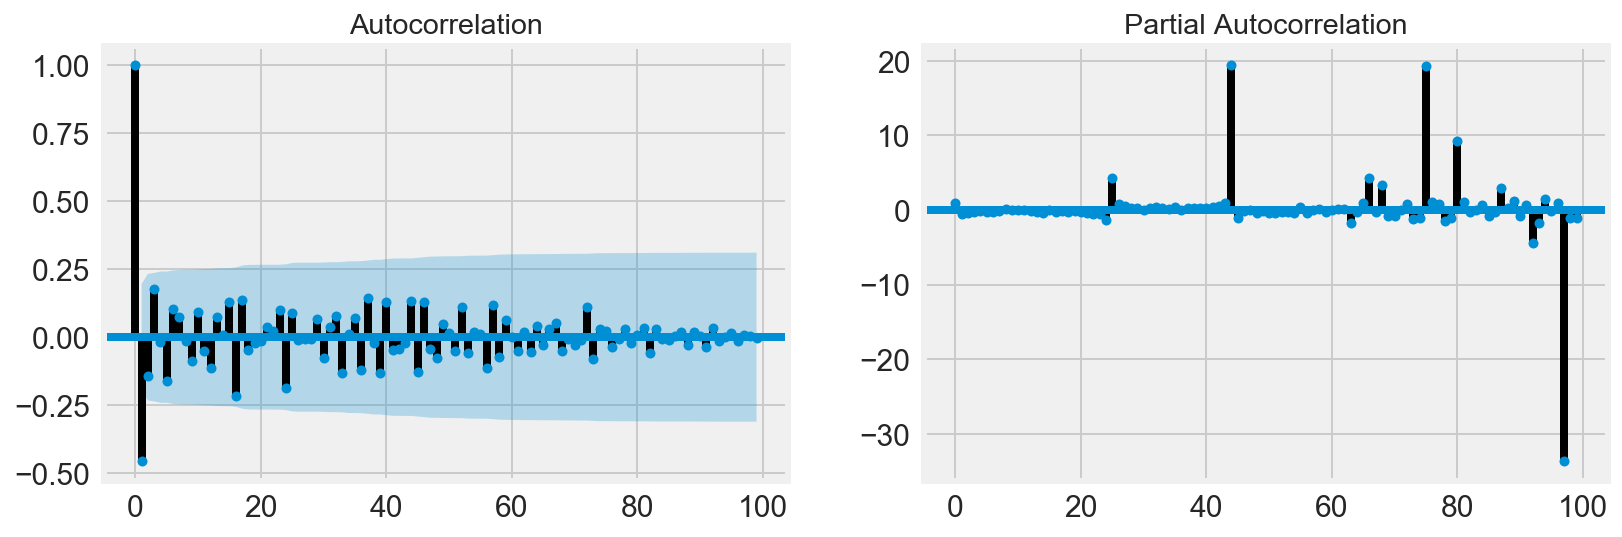

In [43]:
test_and_vis(bus.seasonal_second_difference)

### Summary Dickey-Fuller test

In [49]:
for col in bus.columns:
    print('p-value', col)
    print('\t\t', adfuller(bus[col].dropna())[1])

p-value riders
		 0.5153358797821734
p-value first_difference
		 0.31408183706085196
p-value second_difference
		 3.1263782158282844e-23
p-value seasonal_difference
		 0.12301141534048143
p-value seasonal_first_difference
		 1.4278735579594827e-15
p-value seasonal_second_difference
		 1.6684179920521688e-09


<a id='additional-resources'></a>
## Additional resources
---


+ A Seasonal ARIMA [code-along](http://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html) from statsmodels
+ An excellent [blog code-along](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/) to Seasonal ARIMA + [iPython noteback](https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb)
+ Duke's breakdown of [ACF and PACF](http://people.duke.edu/~rnau/411arim3.htm)
+ Duke's breakdown of available [stationarity transformations](http://people.duke.edu/~rnau/whatuse.htm)
+ A 35min [video econometric](https://www.youtube.com/watch?v=Y2khrpVo6qI) breakdown of ARIMA
+ [Wikipedia Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)
+ Stats Exchange breakdown of [Augmented Dickey-Fuller](http://stats.stackexchange.com/questions/44647/which-dickey-fuller-test-should-i-apply-to-a-time-series-with-an-underlying-mode)
+ A walk-through of selecting pdq from [Duke](http://people.duke.edu/~rnau/411arim.htm)
+ Big data analytics with ARIMA [case study](http://sda-pakdd2014.weebly.com/uploads/2/4/0/8/24088081/7w12.pdf)
+ BONUS! Checkout [Granger Causality tests](https://en.wikipedia.org/wiki/Granger_causality)
